# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/publicdata/eccDNA/")

In [2]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(GenomicRanges)
library(ggsci)
})

In [3]:
Ls <- list.files("./",pattern="ClosestToSA")

In [5]:
Dat <- lapply(Ls,read.table)

In [16]:
Brain <- dplyr::inner_join(Dat[[1]],Dat[[2]],by="V4") %>% 
mutate(dis=case_when(V9.x <= V9.y ~ V9.x,
                    V9.x > V9.y ~ V9.y)) 
Esophagus <- dplyr::inner_join(Dat[[3]],Dat[[4]],by="V4") %>% 
mutate(dis=case_when(V9.x <= V9.y ~ V9.x,
                    V9.x > V9.y ~ V9.y)) 
Lung <- dplyr::inner_join(Dat[[5]],Dat[[6]],by="V4") %>% 
mutate(dis=case_when(V9.x <= V9.y ~ V9.x,
                    V9.x > V9.y ~ V9.y)) 

In [30]:
res <- rbind(Brain %>% mutate(Tissue="Brain"),
      Esophagus %>% mutate(Tissue="Esophagus"),
      Lung %>% mutate(Tissue="Lung"))

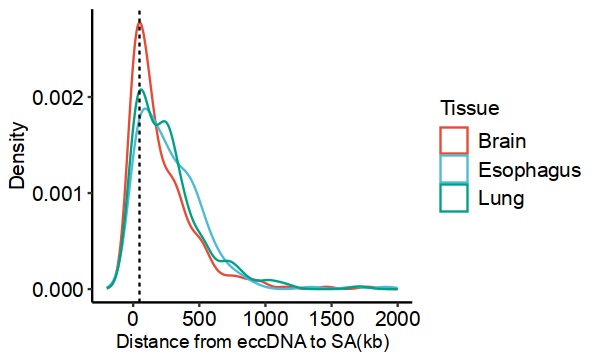

In [54]:
options(repr.plot.width=5,repr.plot.height=3)
ggplot(res %>% mutate(dis=dis/1000), aes(x=dis, color=Tissue)) +
geom_density() +
geom_vline(aes(xintercept=50),linetype=2)+
scale_color_npg() + 
scale_x_continuous(limits = c(-200,2000))+
  #scale_y_continuous(limits = c(0.01,1))+
  labs(x="Distance from eccDNA to SA(kb)", y="Density")+
  theme_classic()+
theme(axis.text.x = element_text(color="black", size=12),axis.title.y = element_text(color="black", size=12),
      legend.title = element_text(color="black", size=12),
      legend.text = element_text(color="black", size=12),
      axis.text.y = element_text(color="black", size=12)
      )
ggsave("../../FINAL_figures/fig4/eccDNA_disToSA.pdf",height = 2.6,width=4.2)